# Linear Regression from Scratch

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Prediction
The following is the predict method where the prediction is done using the dot product of theta and X. The prediction h_theta is given by :-<img src="lin2.jpg">
First calculate the transpose of theta by theta.T, then calculate prediction by the dot product of X and theta transpose.

In [73]:
def predict(X,theta):
  # takes m by n matrix X as input and returns an mx1 vector containing the predictions h_theta(x^i) for each row x^i, i=1,...,m in X
  ##### replace the next line with your code
 
  pred= X.dot(theta.T)
  return pred


In [71]:
def computeCost(X, y, theta):
  # function calculates the cost J(theta) and return its value
  ##### replace the next line with your code #####
  cost = 0
  l = len(y);
  pred = predict(X,theta);
  val_1 = np.power((pred - y),2);
  cost = 1/(2*l) * sum(val_1);
  return cost

In [57]:
def computeGradient(X,y,theta):
  # function calulate the gradient of J(theta) and returns its value
  ##### replace the next line with your code #####
  n=len(y)
  pred = X.dot(theta)
  val_1 = pred - y
  grad = X.T.dot(val_1)/n
  return grad

In [58]:
def gradientDescent(X, y, numparams):
  # iteratively update parameter vector theta
  # -- you should not modify this function
  
  # initialize variables for learning rate and iterations
  alpha = 0.02
  iters = 5000
  cost = np.zeros(iters)
  theta= np.zeros(numparams)

  for i in range(iters):
    theta = theta - alpha * computeGradient(X,y,theta)
    cost[i] = computeCost(X, y, theta)

  return theta, cost

In [59]:

def normaliseData(x):
  # rescale data to lie between 0 and 1
  scale = x.max(axis=0)
  return (x/scale, scale)

In [60]:

def splitData(X,y):
  # split data into training and test parts
  # ... for now, we use all of the data for training and testing
  Xtrain=X; ytrain=y; Xtest=X; ytest=y
  return (Xtrain,ytrain,Xtest,ytest)

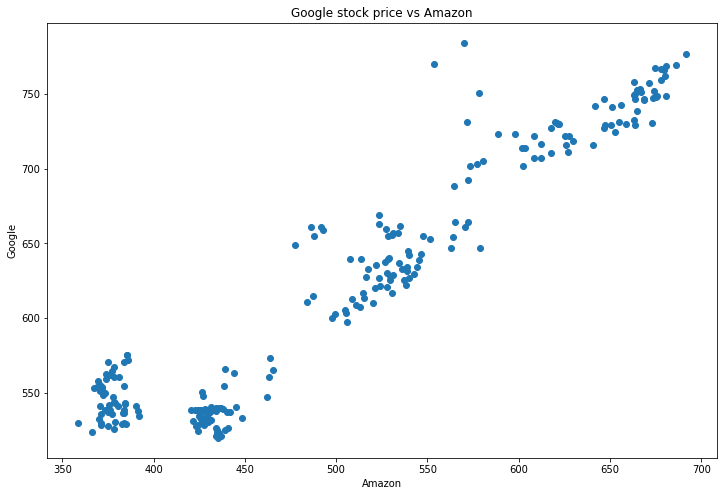

In [61]:
  # load the data
  data=np.loadtxt('stockprices.csv',usecols=(1,2))
  X=data[:,0]
  y=data[:,1]
  
  # plot the data so we can see how it looks 
  # (output is in file graph.png)
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.scatter(X, y, label='Data')
  ax.set_xlabel('Amazon')
  ax.set_ylabel('Google')
  ax.set_title('Google stock price vs Amazon')
  plt.show()


In [62]:

  # split the data into training and test parts
(Xtrain,ytrain,Xtest,ytest)=splitData(X,y)
  
  # add a column of ones to input data
m=len(y) # m is number of training data points
Xtrain = np.column_stack((np.ones((m, 1)), Xtrain))
(m,n)=Xtrain.shape # m is number of data points, n number of features

  

In [63]:

# rescale training data to lie between 0 and 1
(Xt,Xscale) = normaliseData(Xtrain)
(yt,yscale) = normaliseData(ytrain)


In [64]:
# calculate the prediction
print('testing the prediction function ...')
theta=(1,2)
print('when x=[1,1] and theta is [1,2]) cost = ',predict(np.ones(n),theta))
print('approx expected prediction is 3')
print('when x=[[1,1],[5,5]] and theta is [1,2]) cost = ',predict(np.array([[1,1],[5,5]]),theta))  
print('approx expected prediction is [3,15]')
  


testing the prediction function ...
('when x=[1,1] and theta is [1,2]) cost = ', 3.0)
approx expected prediction is 3
('when x=[[1,1],[5,5]] and theta is [1,2]) cost = ', array([ 3, 15]))
approx expected prediction is [3,15]


In [72]:

# calculate the cost when theta iz zero
print('testing the cost function ...')
theta=np.zeros(n)
print('when theta is zero cost = ',computeCost(Xt,yt,theta))
print('approx expected cost value is 0.318')
  
  

testing the cost function ...
('when theta is zero cost = ', 0.0)
approx expected cost value is 0.318


In [66]:

  # calculate the gradient when theta is zero
print('testing the gradient function ...')
print('when theta is zero gradient = ',computeGradient(Xt,yt,theta))
print('approx expected gradient value is [-0.79,-0.59]')
  
 

testing the gradient function ...
('when theta is zero gradient = ', array([-0.79114569, -0.59020578]))
approx expected gradient value is [-0.79,-0.59]


In [38]:
 # perform gradient descent to "fit" the model parameters
print('running gradient descent ...')
theta, cost = gradientDescent(Xt, yt, n)
print('after running gradientDescent() theta=',theta)
print('approx expected value is [0.34, 0.61]')

  

running gradient descent ...
('after running gradientDescent() theta=', array([ 0.34685782,  0.61221899]))
approx expected value is [0.34, 0.61]


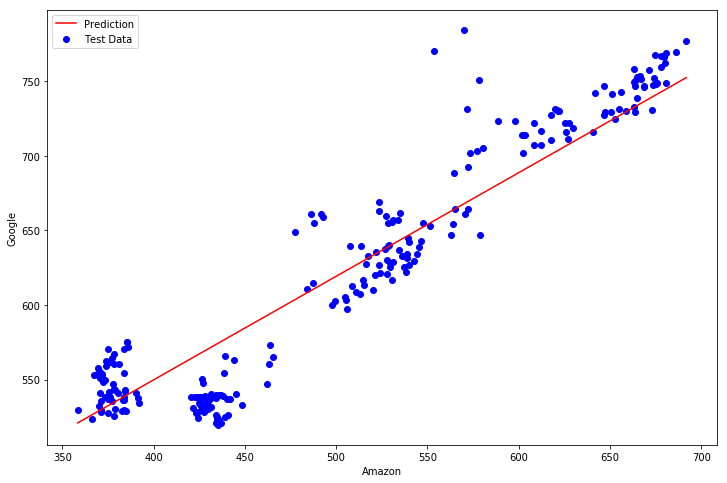

In [44]:
# plot some predictions
Xpred = np.linspace(X.min(), X.max(), 100)
Xpred = np.column_stack((np.ones((100, 1)), Xpred))
ypred = predict(Xpred/Xscale, theta)*yscale
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(Xtest, ytest, color='b', label='Test Data')
ax.plot(Xpred[:,1], ypred, 'r', label='Prediction')
ax.set_xlabel('Amazon')
ax.set_ylabel('Google')
ax.legend(loc=2)
fig.savefig('pred.png')
plt.show()

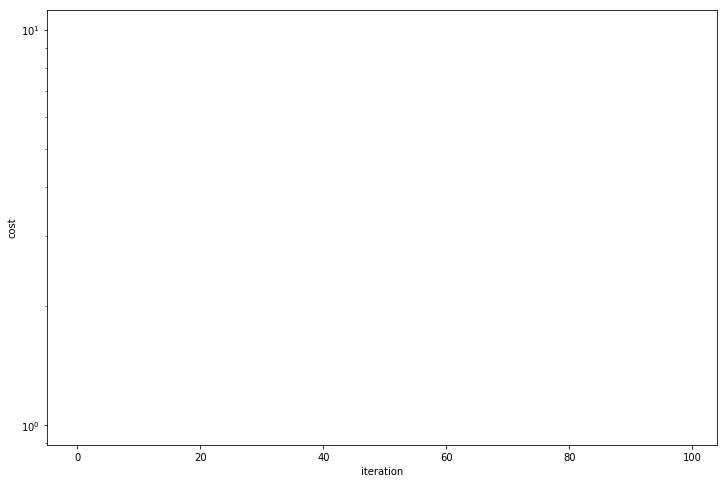

In [42]:

# and plot how the cost varies as the gradient descent proceeds
fig2, ax2 = plt.subplots(figsize=(12, 8))
ax2.semilogy(cost,'r')
ax2.set_xlabel('iteration')
ax2.set_ylabel('cost')
#fig2.savefig('cost.png')
plt.show()  
 



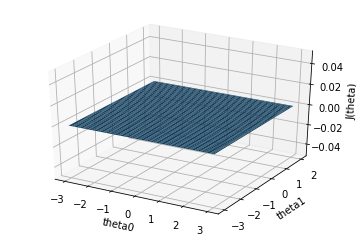

In [43]:
 # plot the cost function
fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1, projection='3d')
n=100
theta0, theta1 = np.meshgrid(np.linspace(-3, 3, n), np.linspace(-3, 2, n))  
cost = np.empty((n,n))
for i in range(n):
    for j in range(n):
      cost[i,j] = computeCost(Xt,yt,(theta0[i,j],theta1[i,j]))
ax3.plot_surface(theta0,theta1,cost)
ax3.set_xlabel('theta0')
ax3.set_ylabel('theta1')
ax3.set_zlabel('J(theta)')
plt.show()